### KNN 
KNN的核心思想是类似于“物以类聚”，通过找到K个离预测样本距离最近的训练样本，通过分类（分类问题）或者平均值（回归问题）来作为预测样本的标签。

#### 1. KNN 中的距离  
- 欧氏距离：$$d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$
- 曼哈顿距离：$$d(x,y) = \sum_{i=1}^n |x_i - y_i|$$
- 闵可夫斯基距离：$$d(x,y) = (\sum_{i=1}^n |x_i - y_i|^p)^\frac{1}{p}$$
- 余弦相似度：$$d(x,y) = \frac{x^T y}{||x|| ||y||}$$

#### 2. KNN解决分类问题  
- 计算预测样本到每个训练样本之间的距离
- 找到距离最近的K个训练样本
- K个训练样本进行投票
- 将投票结果最多的一个标签作为预测样本的结果

#### 3.KNN解决回归问题
- 计算预测样本到每个训练样本之间的距离
- 找到距离最近的K个训练样本
- K个训练样本的结果进行平均值
- 将平均值作为预测样本的结果

#### 4.KNN算法的超参数
- n_neighbors：指定分类 / 回归时参考的最近邻样本数量
- metric:计算样本间相似度的距离公式
- weights:近邻样本对预测结果的贡献权重 
- algorithm:指定KNN中用于计算最近邻的算法  

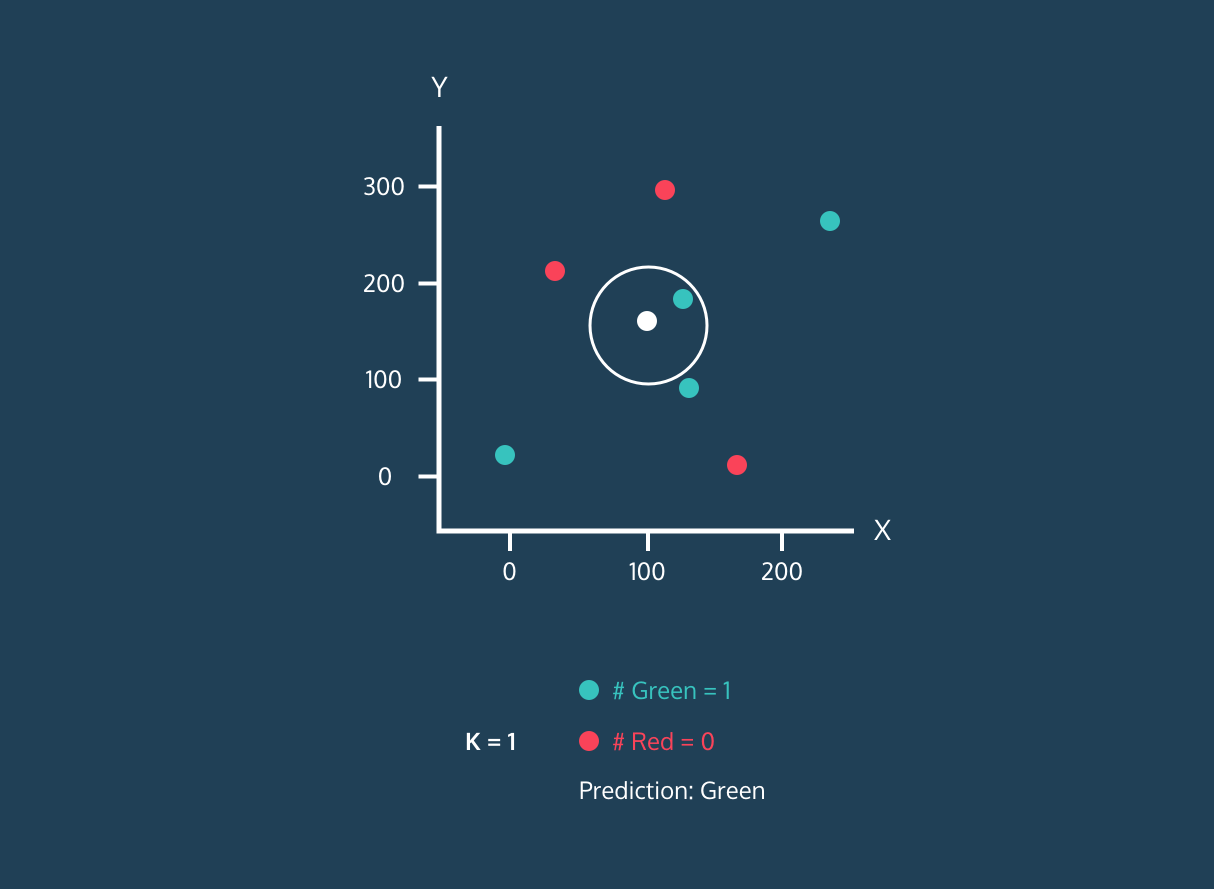

In [46]:
import pandas as pd 
import numpy as np 
import jieba 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec

In [23]:
df = pd.read_csv(
    r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\comments_data.csv',
    encoding='gbk'
)
print(df.head())
print(f'评论总数量：{len(df["comments"])}')

                                            comments  sentiment
0  买来用做PS和Pr等，性能非常强大，外观非常好看，很轻很薄，界面颜色很好看，很流畅，视网膜屏...          0
1  按事情音质非常不错！屏幕分辨率焕然一新！第一次入手苹果生态！感觉好极了。键盘也很耐用爱了爱了...          0
2  性能非常强大，外观非常好看，很轻很薄，界面颜色很好看，很流畅，可以做多用途，京东自营肯定有正...          0
3  运行速度：非常快，屏幕效果：显示很细腻很爽啊！，散热性能：散热效果非常棒，外形外观：深空灰很...          0
4  很流畅，用的很舒服，音质真的强，运行速度：很快，屏幕效果：Nice，散热性能：比intel版...          0
评论总数量：10000


In [24]:
# 提取特征和标签
df = df[df['comments'].notna() & (df['comments'] != '')].reset_index(drop=True)  # 过滤空评论
X_raw = df['comments']  # 原始评论文本
y = df['sentiment']     # 标签（情感值）
print(f'过滤后有效评论数：{len(X_raw)}，标签数：{len(y)}')
print('前5个标签：\n', y.head())

过滤后有效评论数：10000，标签数：10000
前5个标签：
 0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


In [25]:
# 对评论内容进行分词
all_words = []
for sentence in X_raw:
    if sentence and isinstance(sentence, str):  # 确保是有效字符串
        words = jieba.lcut(sentence)
        all_words.append(words)
    else:
        all_words.append([])  # 空评论赋值空列表，保持样本数一致
print('第一条评论分词结果：', all_words[0])
print('完成分词')


第一条评论分词结果： ['买来', '用做', 'PS', '和', 'Pr', '等', '，', '性能', '非常', '强大', '，', '外观', '非常', '好看', '，', '很轻', '很', '薄', '，', '界面', '颜色', '很', '好看', '，', '很', '流畅', '，', '视网膜', '屏幕', '很', '不错', '，', '很', '舒适', '，', '比', '一般', '的', 'IPS', '屏幕', '好', '很多', '，', '散热', '很', '好']
完成分词


In [26]:
# 去除停用词
stopwords_file = r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\stopwords.txt'
# 按行读取停用词，过滤空行（避免停用词列表包含空字符串）
with open(stopwords_file, 'r', encoding='UTF-8') as fp:
    stop_words = [word.strip() for word in fp.read().split('\n') if word.strip() != '']
print('前100个停用词：\n', stop_words[0:100])

# 对每条评论去除停用词和空字符串
for idx in range(len(all_words)):
    all_words[idx] = [
        word for word in all_words[idx] 
        if word not in stop_words and word.strip() != ''
    ]
print('第一条评论去停用词后结果：', all_words[0])
print('完成去停用词')


前100个停用词：
 ['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎']
第一条评论去停用词后结果： ['买来', '用做', 'PS', 'Pr', '性能', '强大', '外观', '好看', '很轻', '薄', '界面', '颜色', '好看', '流畅', '视网膜', '屏幕', '不错', '舒适', 'IPS', '屏幕', '散热']
完成去停用词


In [27]:
model_path = r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\word2vec.model'
word2vec_model = Word2Vec.load(model_path)
sentences_vector = []
vec_size = word2vec_model.wv.vector_size  # 获取词向量维度
print(f'词向量维度：{vec_size}')

for sentence in all_words:
    sentence_vector = np.zeros(vec_size)  # 初始化空的句向量
    if len(sentence) > 0:  # 避免空评论除以0报错
        word_vectors = [word2vec_model.wv.get_vector(word) for word in sentence]
        sentence_vector = np.sum(word_vectors, axis=0) / len(sentence)  # 求和后取平均
    sentences_vector.append(sentence_vector)

词向量维度：100


In [28]:
sentences_vector = np.array(sentences_vector)
print('评论转句向量完成，句向量矩阵维度：', sentences_vector.shape)  
print('最后一条评论的句向量前10个值：', sentences_vector[-1][:10])

评论转句向量完成，句向量矩阵维度： (10000, 100)
最后一条评论的句向量前10个值： [-0.13093315  0.52816784  0.05563208 -0.25566006 -0.09591647 -0.45397788
 -0.01889278  0.69951695 -0.07342069 -0.2799678 ]


In [29]:

#划分训练集和测试集
X = sentences_vector
# 测试集30%，训练集70%，随机种子42保证结果可复现，
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('训练集/测试集划分成功')
print(f'训练集特征维度：{X_train.shape}，训练集标签数量：{y_train.shape}')  
print(f'测试集特征维度：{X_test.shape}，测试集标签数量：{y_test.shape}')  

训练集/测试集划分成功
训练集特征维度：(7000, 100)，训练集标签数量：(7000,)
测试集特征维度：(3000, 100)，测试集标签数量：(3000,)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
最优参数是{'metric': 'cosine', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
交叉验证最优F1：0.9399
KNN训练花费时间: 15.4307秒
训练集准确率: 1.0000
测试集准确率: 0.9403
预测花费时间: 1.0763秒


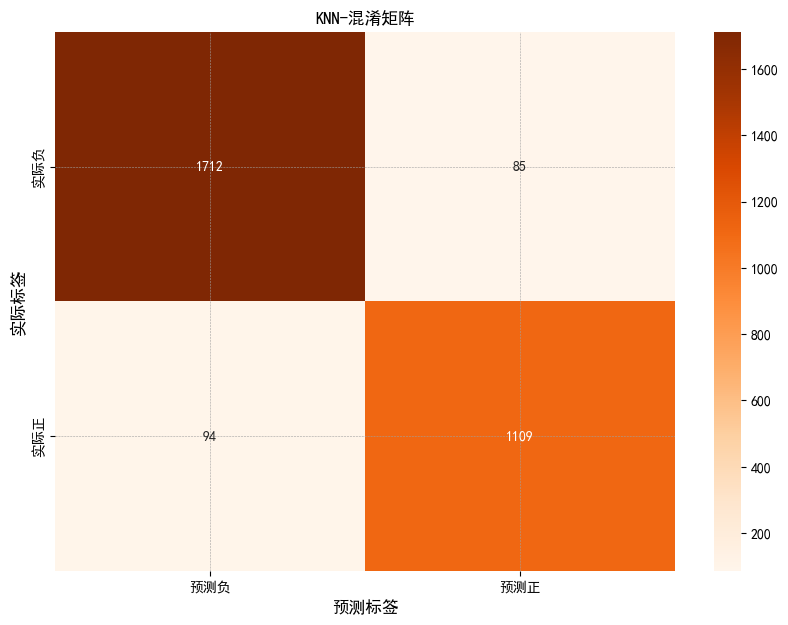

F1 Score: 0.9253


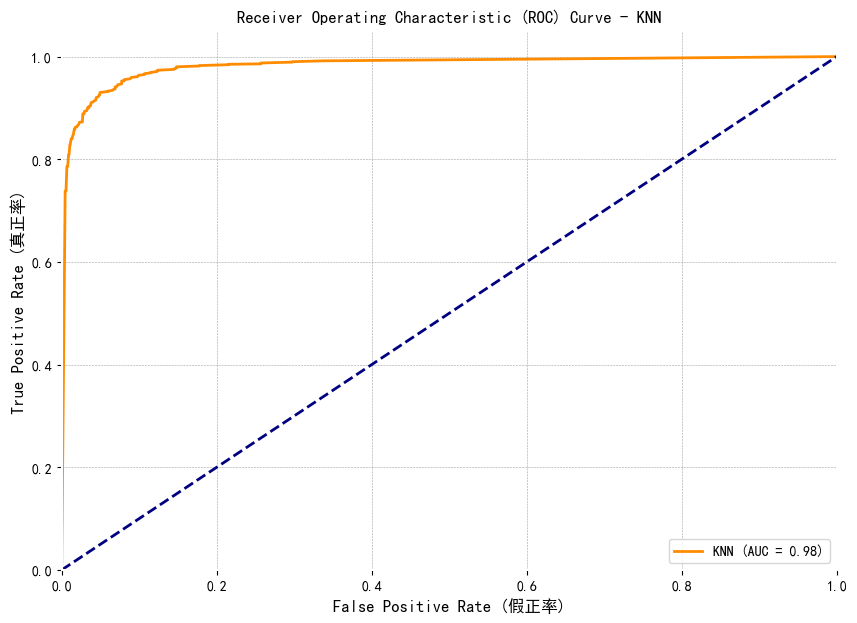

In [30]:
# KNN算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import time

# 初始化计时
start = time.time()


# 超参数
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # K值优先试奇数
    'metric': ['euclidean', 'manhattan', 'cosine'],  # 距离度量
    'weights': ['uniform', 'distance'],  # 权重方式
    'p': [1, 2]  # 仅minkowski生效，这里可顺带验证
}

# 初始模型
knn = KNeighborsClassifier()
# 最优参数（cv=5交叉验证，n_iter=5搜索次数）
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
# 训练模型（拟合训练集）
grid_search.fit(X_train, y_train)

# 输出最优参数
print('最优参数是{}'.format(grid_search.best_params_))
print(f"交叉验证最优F1：{grid_search.best_score_:.4f}")

best_knn=grid_search.best_estimator_
# 用最优模型拟合训练集
best_knn.fit(X_train, y_train)

# 输出模型训练耗时
end = time.time()
print('KNN训练花费时间: {:.4f}秒'.format(end - start))

# 模型预测与评分（训练集+测试集）
start = time.time()
train_score = best_knn.score(X_train, y_train)  # 训练集准确率
test_score = best_knn.score(X_test, y_test)      # 测试集准确率
end = time.time()

# 输出准确率和预测耗时
print('训练集准确率: {:.4f}'.format(train_score))
print('测试集准确率: {:.4f}'.format(test_score))
print('预测花费时间: {:.4f}秒'.format(end - start))


# 测试集预测结果（类别）
y_pred = best_knn.predict(X_test)
# 测试集预测概率（正例概率，[:,1]取第二列，对应正例）
knn_pred_prob = best_knn.predict_proba(X_test)[:, 1]

# 绘制混淆矩阵（评估分类精准度：真负/假正/假负/真正）
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,  # 显示数值
    fmt='d',     # 数值格式为整数
    cmap='Oranges',
    xticklabels=['预测负', '预测正'],
    yticklabels=['实际负', '实际正']
)
plt.xlabel('预测标签')
plt.ylabel('实际标签')
plt.title('KNN-混淆矩阵')
plt.show()

# 输出F1分数（兼顾精确率和召回率，比准确率更适合不平衡数据）
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred)))

# 绘制ROC曲线并计算AUC值（评估模型区分能力，AUC越接近1越好）
fpr_lr, tpr_lr, _ = roc_curve(y_test, knn_pred_prob)  # 计算假正率/真正率
roc_auc_lr = auc(fpr_lr, tpr_lr)                      # 计算AUC值

plt.figure(figsize=(10, 7))
# 绘制ROC曲线
plt.plot(
    fpr_lr, tpr_lr,
    color='darkorange',
    lw=2,
    label='KNN (AUC = %0.2f)' % roc_auc_lr
)
# 绘制随机猜测基准线（对角线）
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# 坐标轴范围
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# 坐标轴标签和标题
plt.xlabel('False Positive Rate (假正率)')
plt.ylabel('True Positive Rate (真正率)')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")  # 图例位置
plt.show()

In [32]:
#抽取50条进行检验
import random

y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


test_total = len(X_test)
sample_num = 50  # 抽取样本数
# 限制start范围：0 ≤ start ≤ 测试集长度-50，若测试集不足50条，直接取全部
if test_total < sample_num:
    start = 0
    sample_num = test_total
    print(f"测试集仅{test_total}条数据，不足50条，将抽取全部数据测试")
else:
    start = random.randint(0, test_total - sample_num)  # 修正原100-2400的硬编码，适配任意测试集长度

# 抽取50条数据（特征+标签），因已重置索引，切片后样本完全匹配
X_data = X_test[start:start+sample_num]
y_data = y_test[start:start+sample_num]
success_test = 0


for sequence_index in range(len(X_data)):
 
    comment_words = all_words[start + sequence_index]
    # 拼接分词结果输出（处理空评论情况）
    comment_str = '/'.join(comment_words) if comment_words else '【空评论】'
    print(f"评论分词结果：{comment_str}")
    # 模型预测（传入二维数组，适配sklearn要求）
    x_sample = X_data[sequence_index:sequence_index+1]  
    res = best_knn.predict(x_sample)[0]  # 取预测结果的标量值（0/1）
    # 【关键修正5】标签用数值类型0/1判断，与模型训练/预测结果一致
    # 输出预测结果
    if res == 0:             
        print('Predict result : 好评', end='\t')             
    else:              
        print('Predict result : 差评', end='\t')            
    # 输出实际结果（y_data已重置索引，直接用位置索引访问，数值类型）
    y_actual = y_data.iloc[sequence_index]  # 用iloc确保位置访问，兼容Series
    if y_actual == 0:
        print('Actual results: 好评', end='\t')
    else:   
        print('Actual results: 差评', end='\t')
    # 判断预测是否正确
    if res == y_actual:
        print('Predict success!', end='\t')
        success_test += 1
    else:
        print('Predict fail!', end='\t')
    print('\n' + '-'*80 + '\n')  
# 计算并输出预测准确度
accuracy = success_test / sample_num
print(f'本次KNN测试共抽取{sample_num}条数据，预测准确度为: {accuracy:.4f}（{success_test}/{sample_num}）')

评论分词结果：外观/时尚/大气/全金属/机身/散热/全/键盘/最舒服/办公/数据录入/有用
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：电脑/流畅/开机/很快/灵敏/屏幕/看着/舒服/人脸识别/提供/很大/音效/挺/笔记本/轻/非常适合/携带/一系列/优点/满意/购物
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：款/笔记本/真的/太赞/收到/货后/迫不及待/打开/最新/11/代/1155G7/CPU/运行/速度/超级/快/画质/超美/风扇/声音/颜色/漂亮/14/寸/尺寸/刚刚
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：运行/速度/速度/很快/没/安装/软件/屏幕/效果/高色域/色彩缤纷/挺/满意/散热/性能/不太热/性能/外形/外观/美观大方/低调/内涵/轻薄/程度/轻薄/重/电池容量/较大/特色/ldquo/图/工具箱/rdquo/ldquo/鲁/大师/rdquo/开箱/验机/满意/购物/体验/联想/笔记本/品牌/值得/信赖/正规渠道/京东/自营/没/推荐/购买/P/S/详细/试用/几天/追评
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：一周/评价/开机/速度/快/安装/简易/屏幕显示/

In [33]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# 解决中文/负号显示问题（关键，避免图表乱码）
plt.rcParams['font.sans-serif'] = [ 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置全局绘图样式（优化颜值，统一风格）
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'f8f9fa'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.4
import mplfinance as mpf
import warnings 
warnings.filterwarnings('ignore')

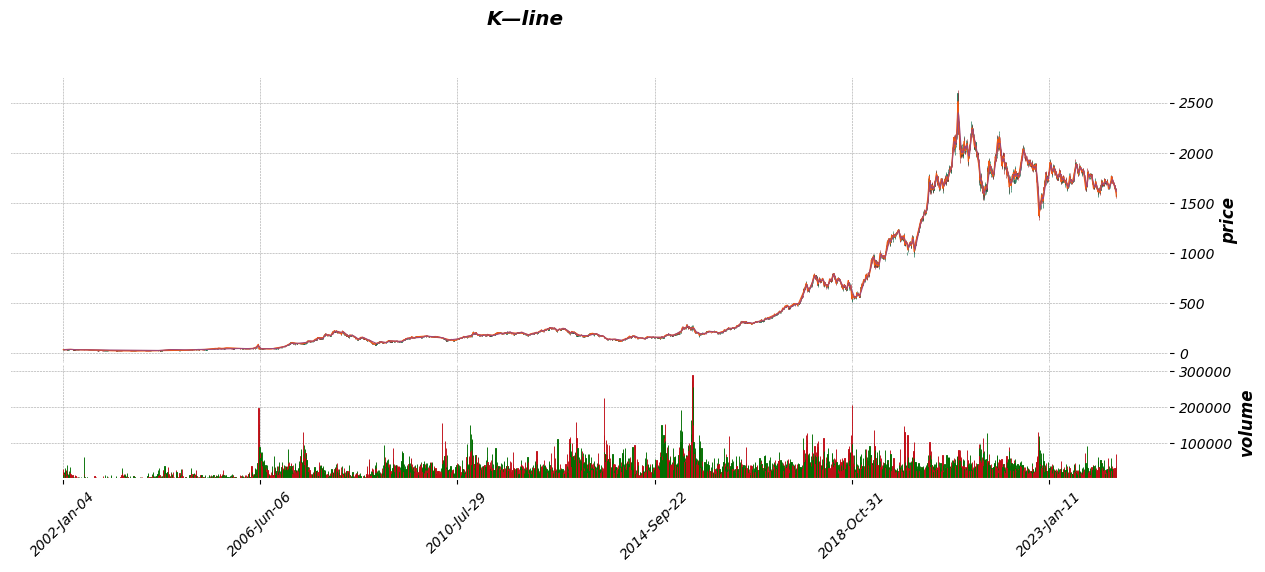

In [34]:
df=pd.read_excel(r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\MaoTai.xlsx')
df.rename(columns={
    'trade_date':'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'vol': 'Volume'  
}, inplace=True)
#转换日期格式
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
#绘制蜡烛图
mpf.plot(df, type='candle', style='charles',
         title='K—line',
         ylabel='price',
         ylabel_lower='volume',
         volume=True,
         figratio=(14,5),
         mav=(3,6,9),
         warn_too_much_data=1000
         
         )  
plt.show()

,Open,Close,Down,Low,High,Volume,Turn,MA5,MA10,RSI,Return
Date,,,,,,,,,,,
2002-01-04,38.72,37.55,-1.00,37.45,38.80,29110,0.0407,NaN,NaN,NaN,NaN
2002-01-07,37.15,37.35,-0.20,36.68,37.50,18943,0.0265,NaN,NaN,NaN,-0.005326
2002-01-08,37.00,36.59,-0.76,36.48,37.59,13287,0.0186,NaN,NaN,NaN,-0.020348
2002-01-09,36.50,36.87,0.28,36.35,37.18,10607,0.0148,NaN,NaN,NaN,0.007652
2002-01-10,36.98,37.24,0.37,36.35,37.39,18816,0.0263,37.120,NaN,NaN,0.010035
2002-01-11,37.01,36.05,-1.19,36.00,37.14,11835,0.0166,36.820,NaN,NaN,-0.031955
2002-01-14,35.70,36.10,0.05,35.43,36.40,18719,0.0262,36.570,NaN,NaN,0.001387
2002-01-15,35.98,36.54,0.44,35.91,37.05,18247,0.0255,36.560,NaN,NaN,0.012188
2002-01-16,36.48,36.35,-0.19,35.40,36.97,13974,0.0195,36.456,NaN,NaN,-0.005200


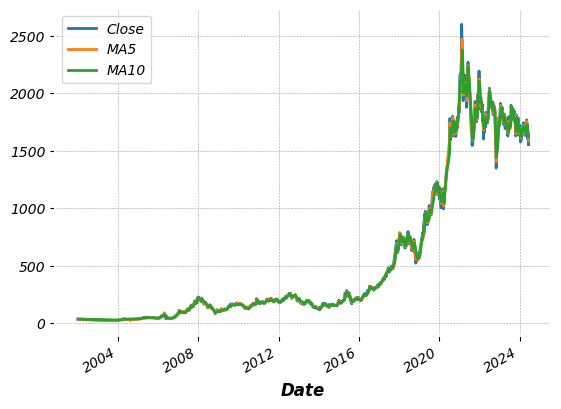

In [35]:
#构造技术指标
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
#构造RSI：相对强弱指标
df['RSI'] = (df['Close'] - df['Close'].rolling(window=14).min()) / (df['Close'].rolling(window=14).max() - df['Close'].rolling(window=14).min())
#构造回报率
df['Return'] = df['Close'] .pct_change()
df[['Close', 'MA5', 'MA10']].plot()
df.head(10)

In [42]:
#KNN回归
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # 标准化工具
from sklearn.model_selection import GridSearchCV
#目标变量：预测未来5天的收盘价
df['target']=df['Close'].shift(-5)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Down','Volume', 'Turn','MA5', 'MA10', 'RSI', 'Return']]
y = df['target']
# 时序划分：取最后5个样本为「未来5天真实数据」，前序为训练测试集（禁止随机打乱）
future_5_X = X.iloc[-5:]    # 未来5天特征（真实）
future_5_y_true = y.iloc[-5:]# 未来5天收盘价真实值（用于对比）
X_train_test = X.iloc[:-5]  # 训练+测试集特征
y_train_test = y.iloc[:-5]  # 训练+测试集目标值

# 划分训练集(80%)和测试集(20%)，shuffle=False保证时序连续性
X_train, X_test, y_train, y_test = train_test_split(
    X_train_test, y_train_test, test_size=0.2, random_state=42, shuffle=False
) 
scaler = StandardScaler()
# 仅用训练集拟合scaler，避免数据泄露
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        
future_5_X_scaled = scaler.transform(future_5_X)

In [43]:
# 超参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}

# 初始化KNN回归器
knn_reg = KNeighborsRegressor(n_jobs=-1)  # 并行加速
ts_cv = TimeSeriesSplit(n_splits=5)  # 5折时序交叉验证

# 网格搜索（适配时序数据）
grid_search = GridSearchCV(
    estimator=knn_reg,
    param_grid=param_grid,
    cv=ts_cv,  # 替换默认CV为时序CV，避免数据泄露
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# 训练网格搜索（用缩放后的训练集）
grid_search.fit(X_train_scaled, y_train)


best_knn = grid_search.best_estimator_

# 预测（用缩放后的特征）
y_test_pred = best_knn.predict(X_test_scaled)    # 测试集预测值
future_5_y_pred = best_knn.predict(future_5_X_scaled)# 未来5天预测值

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [44]:
# 测试集评估
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)  # 增加RMSE（更易理解）
r2 = r2_score(y_test, y_test_pred)

# 未来5天评估
future_mse = mean_squared_error(future_5_y_true, future_5_y_pred)
future_rmse = np.sqrt(future_mse)
future_r2 = r2_score(future_5_y_true, future_5_y_pred)

# 输出评估结果
print("="*60)
print(f"【测试集评估】")
print(f"均方误差(MSE): {mse:.4f} | 均方根误差(RMSE): {rmse:.4f} | 决定系数(R²): {r2:.4f}")
print(f"\n【未来5天评估】")
print(f"均方误差(MSE): {future_mse:.4f} | 均方根误差(RMSE): {future_rmse:.4f} | 决定系数(R²): {future_r2:.4f}")

# 输出最优参数
print(f"\n最优超参数: {grid_search.best_params_}")

# 未来5天真实值vs预测值对比
future_compare = pd.DataFrame({
    '未来天数': [f'第{i}天' for i in range(1,6)],
    '真实收盘价': future_5_y_true.values.round(2),
    '预测收盘价': future_5_y_pred.round(2),
    '绝对误差': np.abs(future_5_y_true.values - future_5_y_pred).round(2)
}, index=future_5_X.index)  # 保留原日期索引

print("\n未来5天收盘价预测详细对比：")
print(future_compare)
print("="*60)


【测试集评估】
均方误差(MSE): 390329.4961 | 均方根误差(RMSE): 624.7636 | 决定系数(R²): -5.1160

【未来5天评估】
均方误差(MSE): 286479.4317 | 均方根误差(RMSE): 535.2377 | 决定系数(R²): -8858.3878

最优超参数: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

未来5天收盘价预测详细对比：
           未来天数    真实收盘价    预测收盘价    绝对误差
Date                                     
2024-05-09  第1天  1704.50  1214.94  489.56
2024-05-10  第2天  1715.00  1136.46  578.54
2024-05-13  第3天  1709.00  1159.24  549.76
2024-05-14  第4天  1705.00  1185.32  519.68
2024-05-15  第5天  1697.71  1163.19  534.52


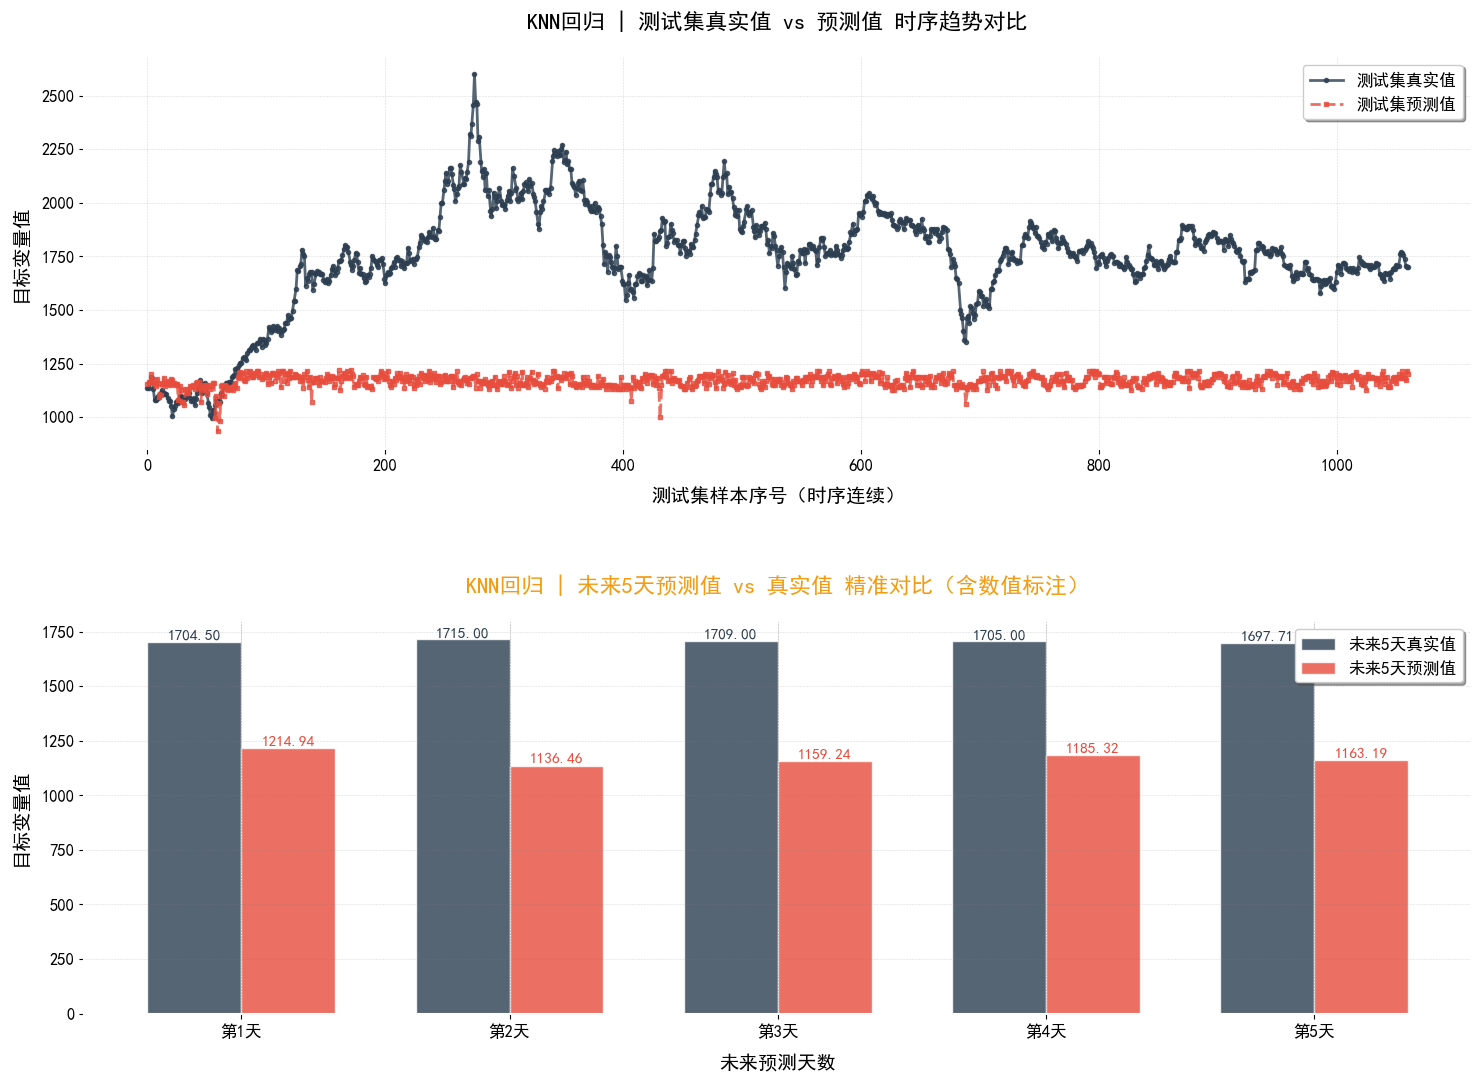


未来5天真实值vs预测值详细对比：
           未来天数      真实值      预测值    绝对误差
Date                                     
2024-05-09  第1天  1704.50  1214.94  489.56
2024-05-10  第2天  1715.00  1136.46  578.54
2024-05-13  第3天  1709.00  1159.24  549.76
2024-05-14  第4天  1705.00  1185.32  519.68
2024-05-15  第5天  1697.71  1163.19  534.52


In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))  
COLOR_TRUE = '#2c3e50'    # 真实值
COLOR_PRED = '#e74c3c'    # 预测值
COLOR_FUTURE = '#f39c12'  # 未来5天
LINE_WIDTH = 2.0
ALPHA = 0.8


x_test = np.arange(len(y_test))
ax1.plot(x_test, y_test, label='测试集真实值', color=COLOR_TRUE, 
         linewidth=LINE_WIDTH, alpha=ALPHA, marker='o', markersize=3)

ax1.plot(x_test, y_test_pred, label='测试集预测值', color=COLOR_PRED, 
         linewidth=LINE_WIDTH, alpha=ALPHA, linestyle='--', marker='s', markersize=3)

ax1.set_title('KNN回归 | 测试集真实值 vs 预测值 时序趋势对比', fontsize=16, pad=20, fontweight='bold')
ax1.set_xlabel('测试集样本序号（时序连续）', fontsize=14, labelpad=10)
ax1.set_ylabel('目标变量值', fontsize=14, labelpad=10)
ax1.legend(loc='best', fontsize=12, frameon=True, shadow=True, fancybox=True)
ax1.grid(True, color='gray', alpha=0.3)
ax1.tick_params(axis='both', labelsize=12)  # 调整刻度字体大小


x_future = np.arange(1, 6)
bar_width = 0.35
ax2.bar(x_future - bar_width/2, future_5_y_true, bar_width, 
         label='未来5天真实值', color=COLOR_TRUE, alpha=ALPHA, edgecolor='white', linewidth=1)
ax2.bar(x_future + bar_width/2, future_5_y_pred, bar_width, 
         label='未来5天预测值', color=COLOR_PRED, alpha=ALPHA, edgecolor='white', linewidth=1)

for i, (true_val, pred_val) in enumerate(zip(future_5_y_true, future_5_y_pred)):
    ax2.text(x_future[i] - bar_width/2, true_val + 1, f'{true_val:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=COLOR_TRUE)
    ax2.text(x_future[i] + bar_width/2, pred_val + 1, f'{pred_val:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=COLOR_PRED)

ax2.set_title('KNN回归 | 未来5天预测值 vs 真实值 精准对比（含数值标注）', 
              fontsize=16, pad=20, fontweight='bold', color=COLOR_FUTURE)
ax2.set_xlabel('未来预测天数', fontsize=14, labelpad=10)
ax2.set_ylabel('目标变量值', fontsize=14, labelpad=10)
ax2.set_xticks(x_future)  # 固定x轴刻度为1-5天
ax2.set_xticklabels([f'第{i}天' for i in x_future], fontsize=12)
ax2.legend(loc='best', fontsize=12, frameon=True, shadow=True, fancybox=True)
ax2.grid(True, axis='y', color='gray', alpha=0.3)  # 仅显示y轴网格，更清晰
ax2.tick_params(axis='y', labelsize=12)


plt.tight_layout(pad=5.0)
plt.show()

future_compare = pd.DataFrame({
    '未来天数': [f'第{i}天' for i in range(1,6)],
    '真实值': future_5_y_true.round(2),
    '预测值': future_5_y_pred.round(2),
    '绝对误差': np.abs(future_5_y_true - future_5_y_pred).round(2)
})
print("\n未来5天真实值vs预测值详细对比：")
print(future_compare)

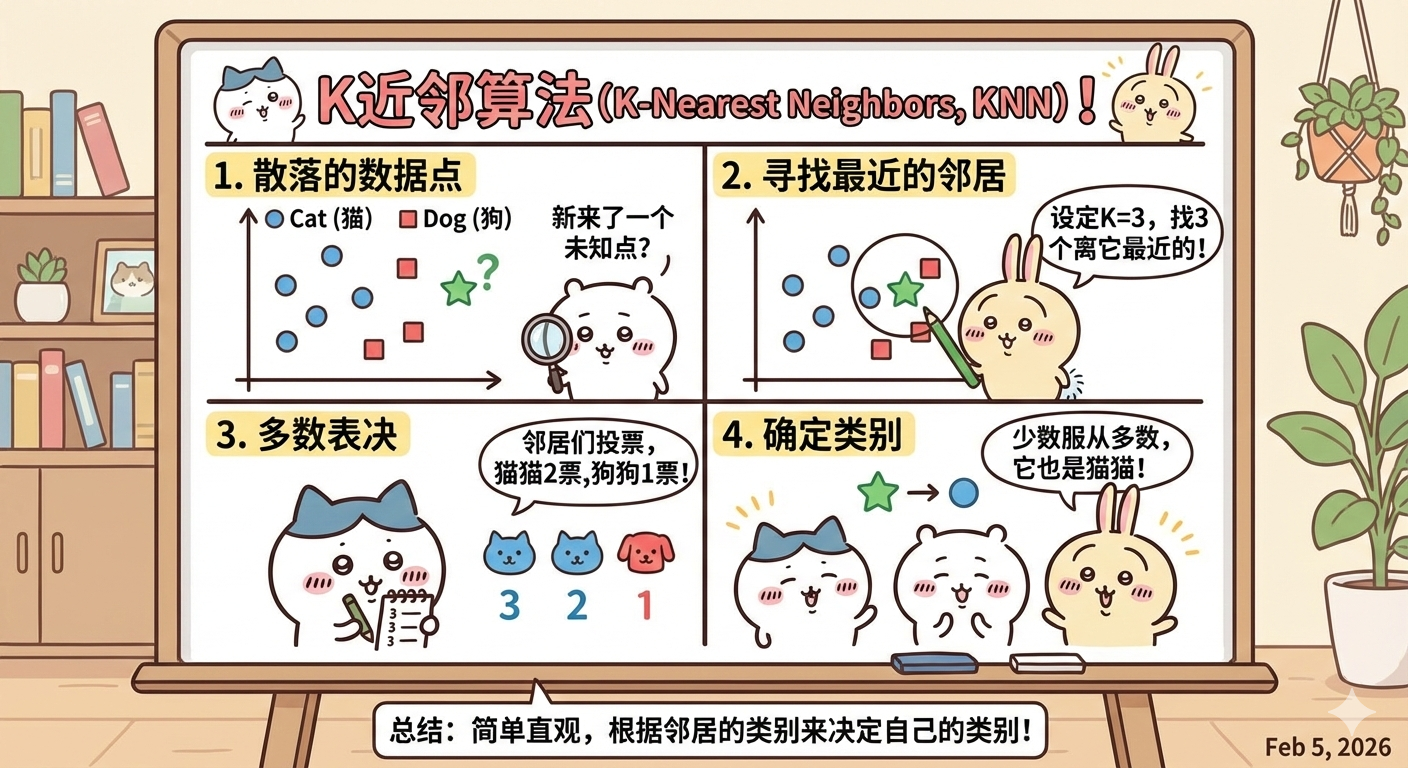